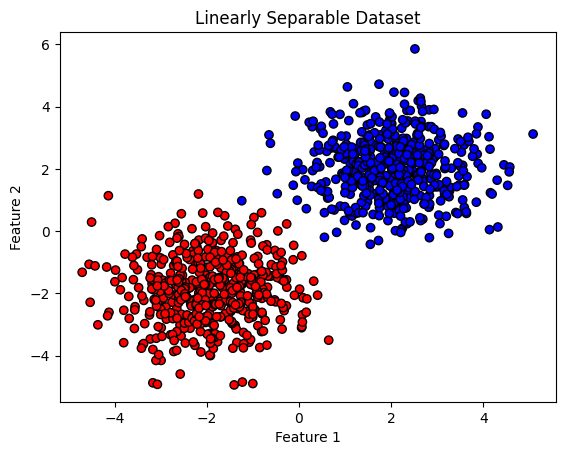

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000
np.random.seed(42)

# Generate random points
class_1 = np.random.randn(num_points // 2, 2) + [2, 2]
class_2 = np.random.randn(num_points // 2, 2) + [-2, -2]

# Combine the points
data = np.vstack((class_1, class_2))
labels = np.hstack((np.zeros(num_points // 2), np.ones(num_points // 2)))

# Plot the dataset
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

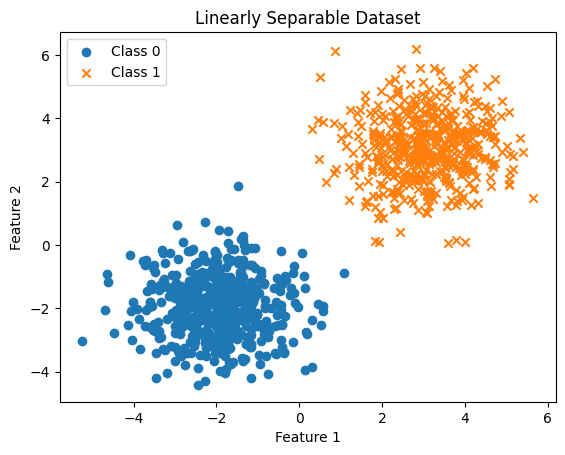

In [63]:
def generate_dataset(num_points, mean_class_a, variance_class_a, mean_class_b, variance_class_b):
    """
    Generates a linearly separable dataset by creating two concentric circles with given mean and variance
    
    """
    np.random.seed(42)
    # Class -1 points
    class_a_points = np.random.normal(loc=mean_class_a, scale=variance_class_a, size=(num_points // 2, 2))    
    # Class 1 points
    class_b_points = np.random.normal(loc=mean_class_b, scale=variance_class_b, size=(num_points // 2, 2))
    
    # Combine the points and labels
    X = np.vstack((class_a_points, class_b_points))
    y = np.concatenate((-1 * np.ones(num_points // 2), np.ones(num_points // 2)))

    # Shuffle the dataset
    shuffle_indices = np.random.permutation(num_points)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    
    return X, y


def plot_dataset(features, labels, title):
    """
    Plots the dataset created 
    """
    plt.scatter(features[labels == -1, 0], features[labels == -1, 1], marker='o', label='Class 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], marker='x', label='Class 1')
    plt.title('Linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



num_points = 1000
mean_class_a = [-2, -2]
variance_class_a = [1, 1]
mean_class_b = [3, 3]
variance_class_b = [1, 1]

features, labels = generate_dataset(num_points,mean_class_a,variance_class_a,mean_class_b,variance_class_b)

# Plot the original dataset
plot_dataset(features, labels, title='Original Dataset')

In [54]:
# making dataset a bit noisy

dataset_size=1000
flip_percentage=0.10
num_flips = int(flip_percentage*dataset_size)
flip_indices = np.random.choice(dataset_size, num_flips, replace=False)
#labels[flip_indices] = -labels[flip_indices]
noisy_labels = -labels[flip_indices]

In [55]:
plot_dataset(features,  -labels[flip_indices], title='Noisy Dataset')

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1000 but size of corresponding boolean axis is 100

# Decision boundary before training


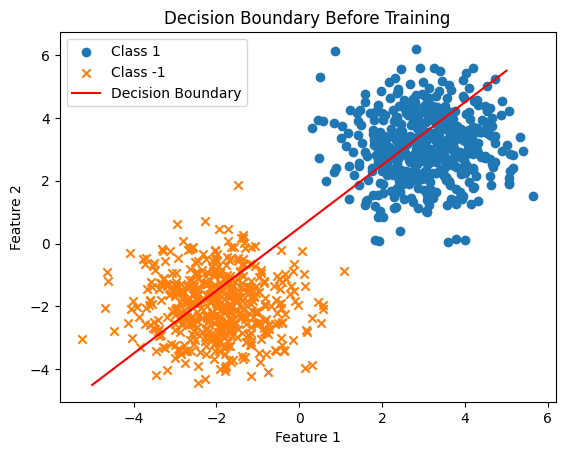

In [ ]:
# Plot decision boundary and dataset
def plot_decision_boundary(features, labels, weights, bias, title):
    """
    Plots the decision boundary generated after training the perceptron learning algorithm
    """
    plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1], label='Class 1', marker='o')
    plt.scatter(features[labels == -1][:, 0], features[labels == -1][:, 1], label='Class -1', marker='x')
    
    x_vals = np.linspace(-5, 5, 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5

# Plot decision boundary and dataset before training
plot_decision_boundary(features, labels, weights_initial, bias_initial, title='Decision Boundary Before Training')


In [37]:
weights, bias,num_updates = perceptron_train(features, labels,weights_initial,bias_initial)

print("Number of iterations k = ",num_updates)
# Plot the dataset with the decision boundary
plot_decision_boundary(features, labels, weights, bias, title='Decision Boundary After Training')

NameError: name 'perceptron_train' is not defined

# issues:
    - my data is the issue?
    - or the algorithm is the issue?
    - because my below line of code is behaving differently for the different execution , i am getting a different output everytime
    - how do i make the dataset noisy?

[2.52860243 2.69579123]


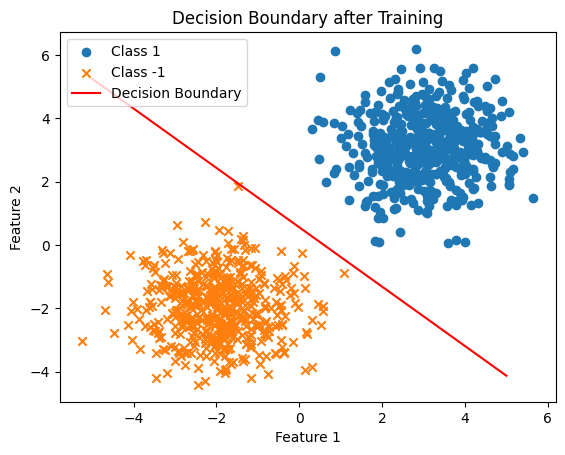

In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

class Perceptron:
    def __init__(self,iter):
        self.weights = None
        self.bias = 0.5
        self.iter = iter
    
    def pla_train(self,X,y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        # what shall be the convergence criteria?
        k = 0
        # how do i calculate misclassification in this code.
        while k<self.iter:
            self.misclassified = 0
            for i in range(n_samples):
                linear_output = (np.transpose(self.weights) @ X[i]+self.bias)*y[i]
                if linear_output <=0:
                    self.weights = self.weights+ y[i]*X[i]
                    self.bias+= y[i]
                    self.misclassified+=1
            k+=1
    
    def pla_predict(self,X):
        linear_output = np.dot(X[i],self.weights)
        return linear_output


if __name__ == "__main__":

    #X,y =datasets.make_blobs(n_samples=1000,n_features=2,centers=2,center_box=(0,10))
    #y = np.where(y==0,-1,1)
    
    
    # print(X,y)
    # print(X[:,0],X[:,1])
    def visualize(X,y,msg):
        plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr', edgecolors='k')
        plt.xlabel(f'Feature 1 {msg}')
        plt.ylabel(f'Feature 2 {msg}')
        plt.title(f'Linearly Separable Dataset {msg}')
        plt.show()
        
    perceptron = Perceptron(1000) # criteria to chose the hyperparameter
    perceptron.pla_train(features,labels)
    print(perceptron.weights)
    
    
    plot_decision_boundary(features, labels, perceptron.weights, perceptron.bias, title='Decision Boundary after Training')

    # perceptron2 = Perceptron(1000) # criteria to chose the hyperparameter
    # perceptron2.pla_train(X,y)
    # print(perceptron2.weights)
    
    # perceptron3 = Perceptron(10) # criteria to chose the hyperparameter
    # perceptron3.pla_train(X,y)
    # print(perceptron3.weights)

    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # # Plot decision boundary
    # x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    # x2 = -(perceptron.weights[0] * x1 ) / perceptron.weights[1]
    # plt.plot(x1, x2, color='black')

    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.title('Perceptron Classifier with Decision Boundary')
    # plt.show()

[3.4474818  4.17025056]


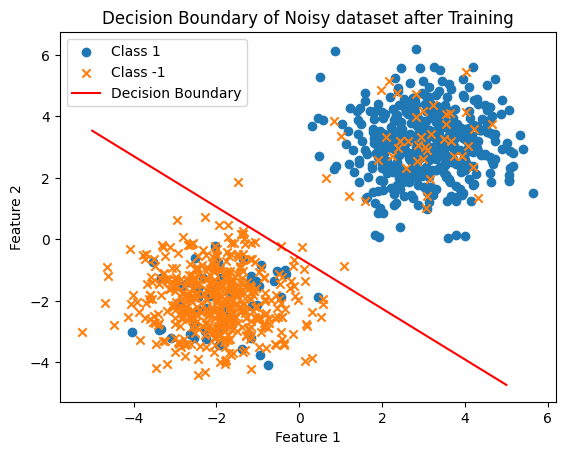

In [42]:
perceptron_noisy = Perceptron(1000) # criteria to chose the hyperparameter
perceptron_noisy.pla_train(features,labels)
print(perceptron_noisy.weights)


plot_decision_boundary(features, labels, perceptron_noisy.weights, perceptron_noisy.bias, title='Decision Boundary of Noisy dataset after Training')


[-1.41325851 -0.48580268]


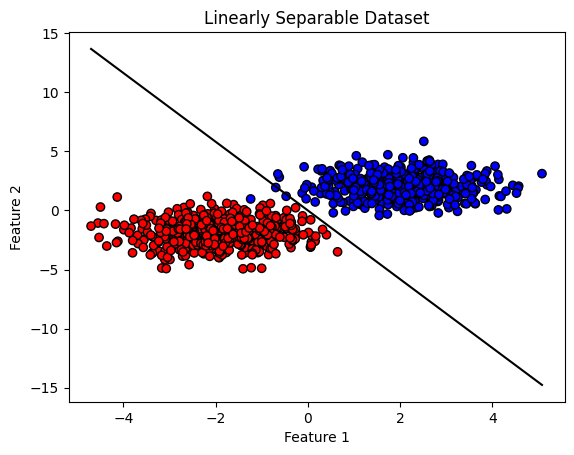

In [22]:
perceptron2 = Perceptron(10) # criteria to chose the hyperparameter
perceptron2.pla_train(data,labels)
print(perceptron2.weights)


# Plot decision boundary
x1 = np.linspace(min(data[:, 0]), max(data[:, 0]), 1000)
x2 = -(perceptron2.weights[0] * x1 ) / perceptron2.weights[1]
plt.plot(x1, x2, color='black')

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

[-1.41325851 -0.48580268]


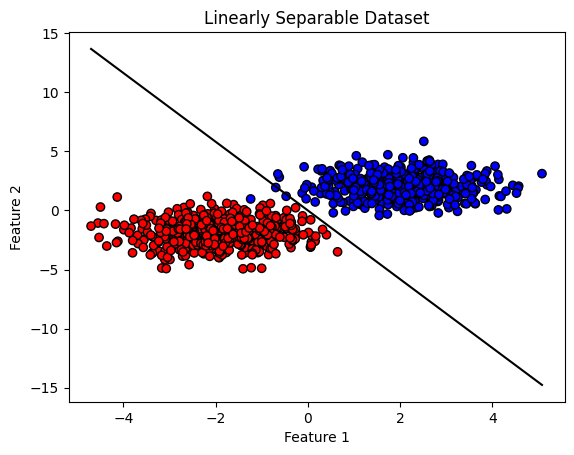

In [19]:
perceptron3 = Perceptron(100) # criteria to chose the hyperparameter
perceptron3.pla_train(data,labels)
print(perceptron3.weights)


# Plot decision boundary
x1 = np.linspace(min(data[:, 0]), max(data[:, 0]), 1000)
x2 = -(perceptron3.weights[0] * x1 ) / perceptron3.weights[1]
plt.plot(x1, x2, color='black')

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset') 
plt.show()

## Gradient descent algorithm
- this part is majorly about the gradient descent algo implemented for the part (a) with linearly separable dataset.
  
theta is w,b
- how do implement the backpropagation part, 
- best is to apply the rate of change formula. how this grad_w will be calculated?

eta=0.01
while max_iterations<1000:
 

- how do i create the dataset noisy?
- 

C:\Users\pantm\AppData\Local\Temp\ipykernel_16184\3866192774.py:32: RuntimeWarning: divide by zero encountered in log
  cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))


Final Weights: [11.18143743  9.18456384]
Final Bias: -4.571020016781619
Final Cost: nan
[21.16102778 19.00794985] -4.515054245646967


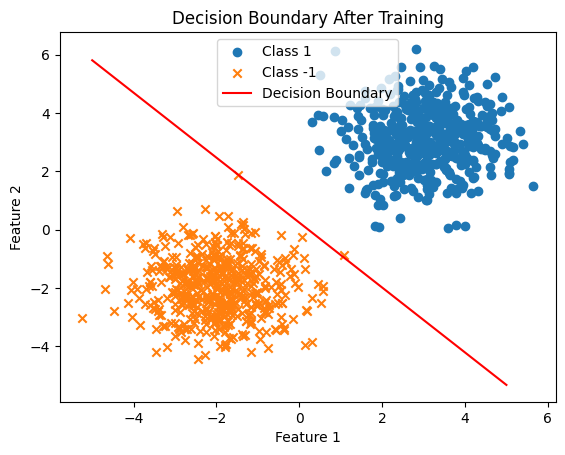

In [66]:
import numpy as np
weights_initial = np.random.randn(data.shape[1], 1)
bias_initial = 0.5


import numpy as np

# Initialize weights and bias
weights_initial = np.random.randn(features.shape[1], 1)
bias_initial = 0.5

def sigmoid(X, weights, bias):
    z = X.dot(weights) + bias
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, weights, bias, learning_rate=0.01, n_iter=1000):
    m = X.shape[0]  # Number of samples
    for _ in range(n_iter):
        predictions = sigmoid(X, weights, bias)
        errors = predictions - y
        gradients_weights = X.T.dot(errors) / m
        gradients_bias = np.sum(errors) / m
        
        weights -= learning_rate * gradients_weights
        bias -= learning_rate * gradients_bias
    
    return weights, bias

def cross_entropy_loss(X, y, weights, bias):
    m = len(y)
    h = sigmoid(X, weights, bias)
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

# Example usage
# np.random.seed(42)
# data = np.random.rand(1000, 2)  # Example data with 1000 samples and 2 features
# labels = np.random.randint(0, 2, 1000).reshape(-1, 1)  # Binary labels (0 or 1)

# Initialize weights and bias
#weights_initial = np.random.randn(features.shape[1], 1)
weights_initial = np.array([1.0, -1.0])
bias_initial = 0.5

# Run gradient descent
final_weights, final_bias = gradient_descent(features, labels, weights_initial, bias_initial)

# Calculate final cost
final_cost = cross_entropy_loss(features, labels, final_weights, final_bias)
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)
print("Final Cost:", final_cost)


weights,bias = gradient_descent(features,labels,weights_initial,bias_initial)
print(weights,bias)

plot_decision_boundary(features, labels, weights, bias, title='Decision Boundary After Training')


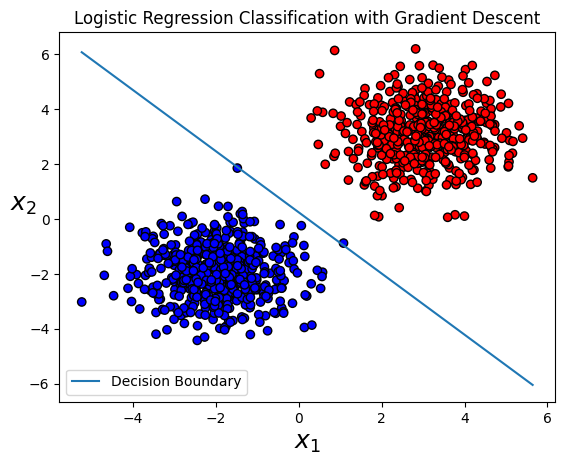

In [67]:
plt.scatter(features[:, 0], features[:, 1], c=labels.flatten(), cmap="bwr", edgecolor="k")
x_values = [np.min(features[:, 0]), np.max(features[:, 0])]
y_values = -(weights[0] * np.array(x_values) + bias) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", rotation=0, fontsize=18)
plt.title("Logistic Regression Classification with Gradient Descent")
plt.legend()
plt.show()

## question3 
- linear regression along with MLP

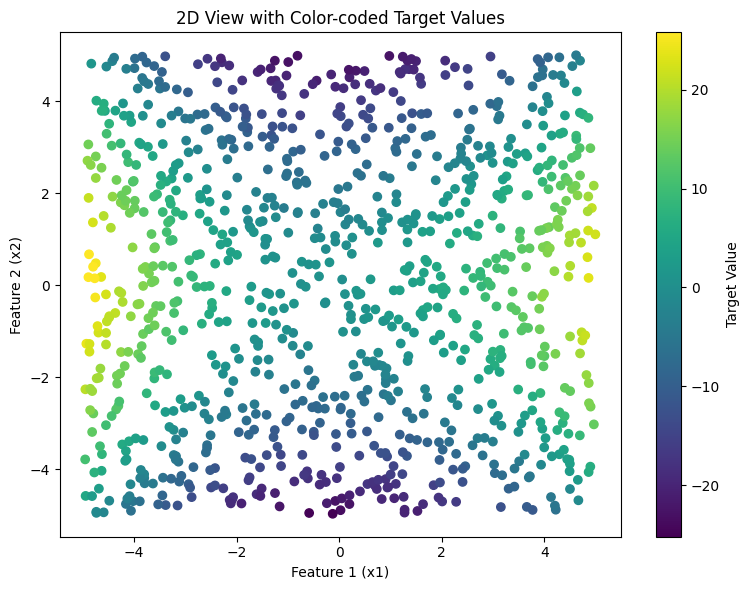


Dataset Statistics:
Number of samples: 1000

Feature 1 (x1):
Mean: -0.10
Std: 2.92
Min: -4.95
Max: 5.00

Feature 2 (x2):
Mean: 0.07
Std: 2.92
Min: -4.97
Max: 4.99

Target (y):
Mean: -0.18
Std: 10.86
Min: -25.23
Max: 25.80


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 samples
n_samples = 1000

# Generate feature 1: x1 uniformly distributed between -5 and 5
x1 = np.random.uniform(-5, 5, n_samples)

# Generate feature 2: x2 uniformly distributed between -5 and 5
x2 = np.random.uniform(-5, 5, n_samples)

# Generate target y using a non-linear function
# y = sin(x1) + cos(x2) + x1^2 - x2^2 + noise
y = (np.sin(x1) + np.cos(x2) + x1**2 - x2**2 + 
     np.random.normal(0, 0.5, n_samples))

# Create a figure with two subplots
fig = plt.figure(figsize=(15, 6))

# # 3D Surface plot
# ax1 = fig.add_subplot(121, projection='3d')
# ax1.scatter(x1, x2, y, c=y, cmap='viridis')
# ax1.set_xlabel('Feature 1 (x1)')
# ax1.set_ylabel('Feature 2 (x2)')
# ax1.set_zlabel('Target (y)')
# ax1.set_title('3D Visualization of Non-linear Regression Data')

# 2D scatter plot with color representing y values
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(x1, x2, c=y, cmap='viridis')
ax2.set_xlabel('Feature 1 (x1)')
ax2.set_ylabel('Feature 2 (x2)')
ax2.set_title('2D View with Color-coded Target Values')
plt.colorbar(scatter, label='Target Value')

plt.tight_layout()
plt.show()

# Create a dictionary with the dataset
dataset = {
    'feature1': x1,
    'feature2': x2,
    'target': y
}

# Print some basic statistics
print("\nDataset Statistics:")
print(f"Number of samples: {n_samples}")
print("\nFeature 1 (x1):")
print(f"Mean: {np.mean(x1):.2f}")
print(f"Std: {np.std(x1):.2f}")
print(f"Min: {np.min(x1):.2f}")
print(f"Max: {np.max(x1):.2f}")

print("\nFeature 2 (x2):")
print(f"Mean: {np.mean(x2):.2f}")
print(f"Std: {np.std(x2):.2f}")
print(f"Min: {np.min(x2):.2f}")
print(f"Max: {np.max(x2):.2f}")

print("\nTarget (y):")
print(f"Mean: {np.mean(y):.2f}")
print(f"Std: {np.std(y):.2f}")
print(f"Min: {np.min(y):.2f}")
print(f"Max: {np.max(y):.2f}")